In [ ]:
!pip install autokeras
!pip install keras
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 83.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
np.random.seed(42)

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from scipy import stats
from sklearn.preprocessing import LabelEncoder
import autokeras as ak

Using TensorFlow backend


In [ ]:
file_path = r'/content/drive/MyDrive/ML_PROJECTS/archive/HAM10000_metadata[1].csv'
skin_df = pd.read_csv(file_path)

In [ ]:
SIZE=32

In [ ]:
# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [ ]:
skin_df['label'] = le.transform(skin_df["dx"])
print(skin_df.sample(10))

        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extremity      5  
8984  lower extremity      5  
2310 

<ipython-input-7-b0924397de19>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red');


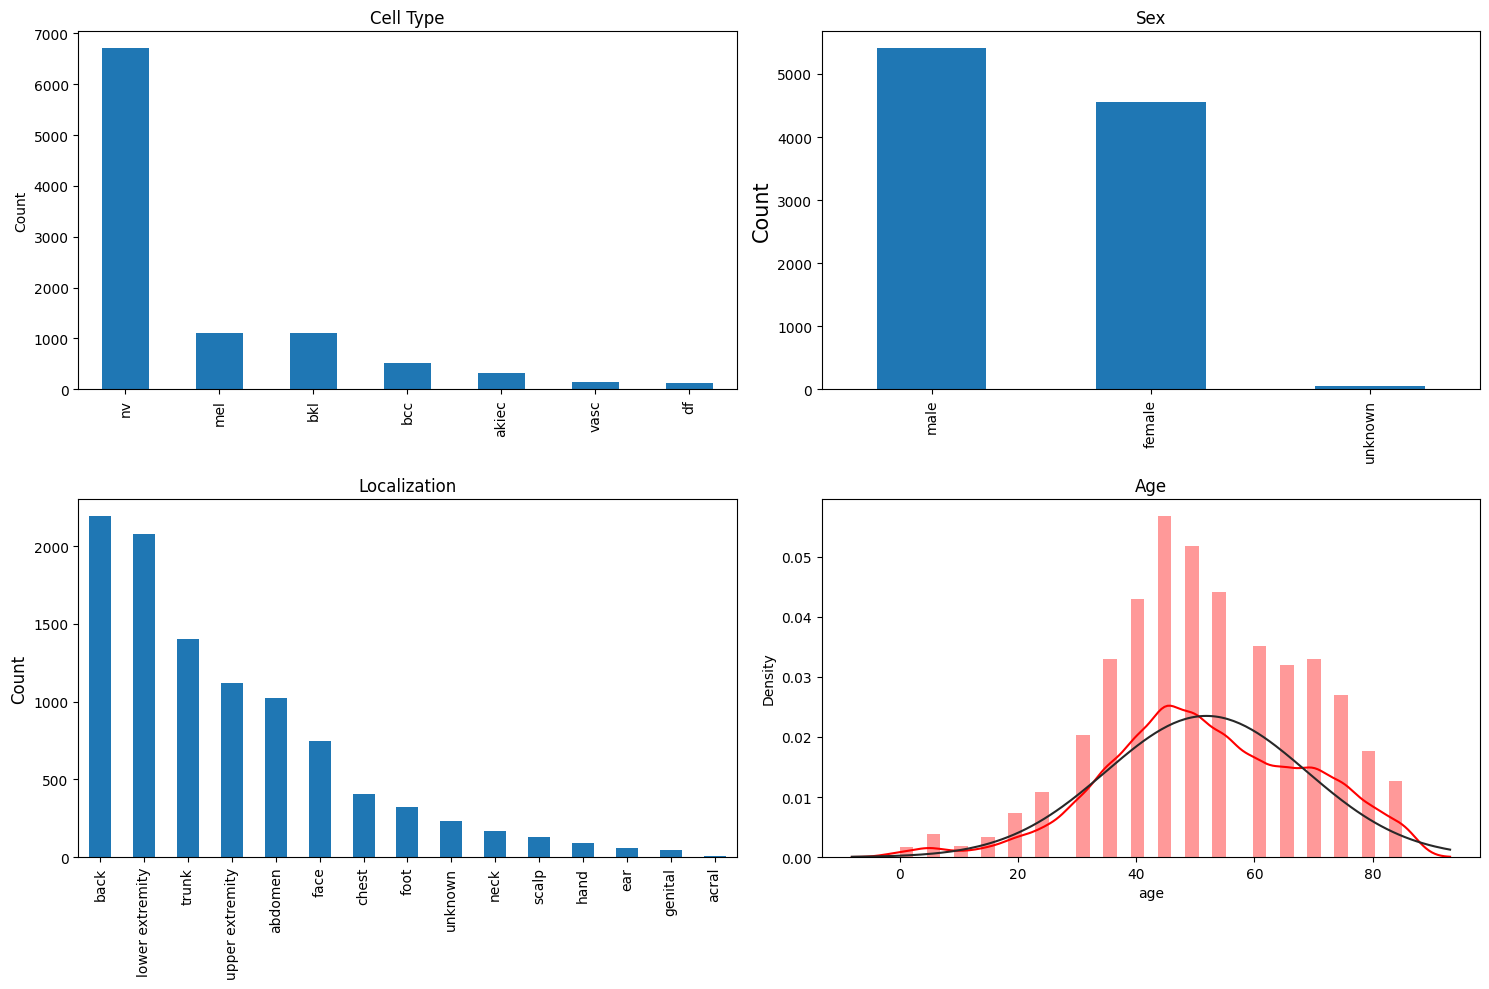

In [ ]:
# Data distribution visualization
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')


ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.utils import resample
print(skin_df['label'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64


In [ ]:
df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

In [ ]:
n_samples=500
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [ ]:
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced,
                              df_2_balanced, df_3_balanced,
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [ ]:
print(skin_df_balanced['label'].value_counts())

0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: label, dtype: int64


In [ ]:
import os
from glob import glob

image_path = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join('/content/drive/MyDrive/ML_PROJECTS/archive', '*', '*.jpg'))}


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

# Use the path to read images and resize them to SIZE x SIZE
SIZE = 64  # Change this to the desired size
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))


In [ ]:
print(skin_df_balanced.head())

        lesion_id      image_id     dx dx_type   age   sex     localization  \
9789  HAM_0003136  ISIC_0026645  akiec   histo  65.0  male             back   
9957  HAM_0006587  ISIC_0025780  akiec   histo  70.0  male             face   
9793  HAM_0005505  ISIC_0024450  akiec   histo  50.0  male  upper extremity   
9758  HAM_0003455  ISIC_0027896  akiec   histo  75.0  male             hand   
9875  HAM_0005459  ISIC_0029268  akiec   histo  85.0  male  upper extremity   

      label                                               path  \
9789      0  /content/drive/MyDrive/ML_PROJECTS/archive/HAM...   
9957      0  /content/drive/MyDrive/ML_PROJECTS/archive/HAM...   
9793      0  /content/drive/MyDrive/ML_PROJECTS/archive/HAM...   
9758      0  /content/drive/MyDrive/ML_PROJECTS/archive/HAM...   
9875      0  /content/drive/MyDrive/ML_PROJECTS/archive/HAM...   

                                                  image  
9789  [[[150, 112, 104], [160, 125, 116], [162, 127,...  
9957  [[[139

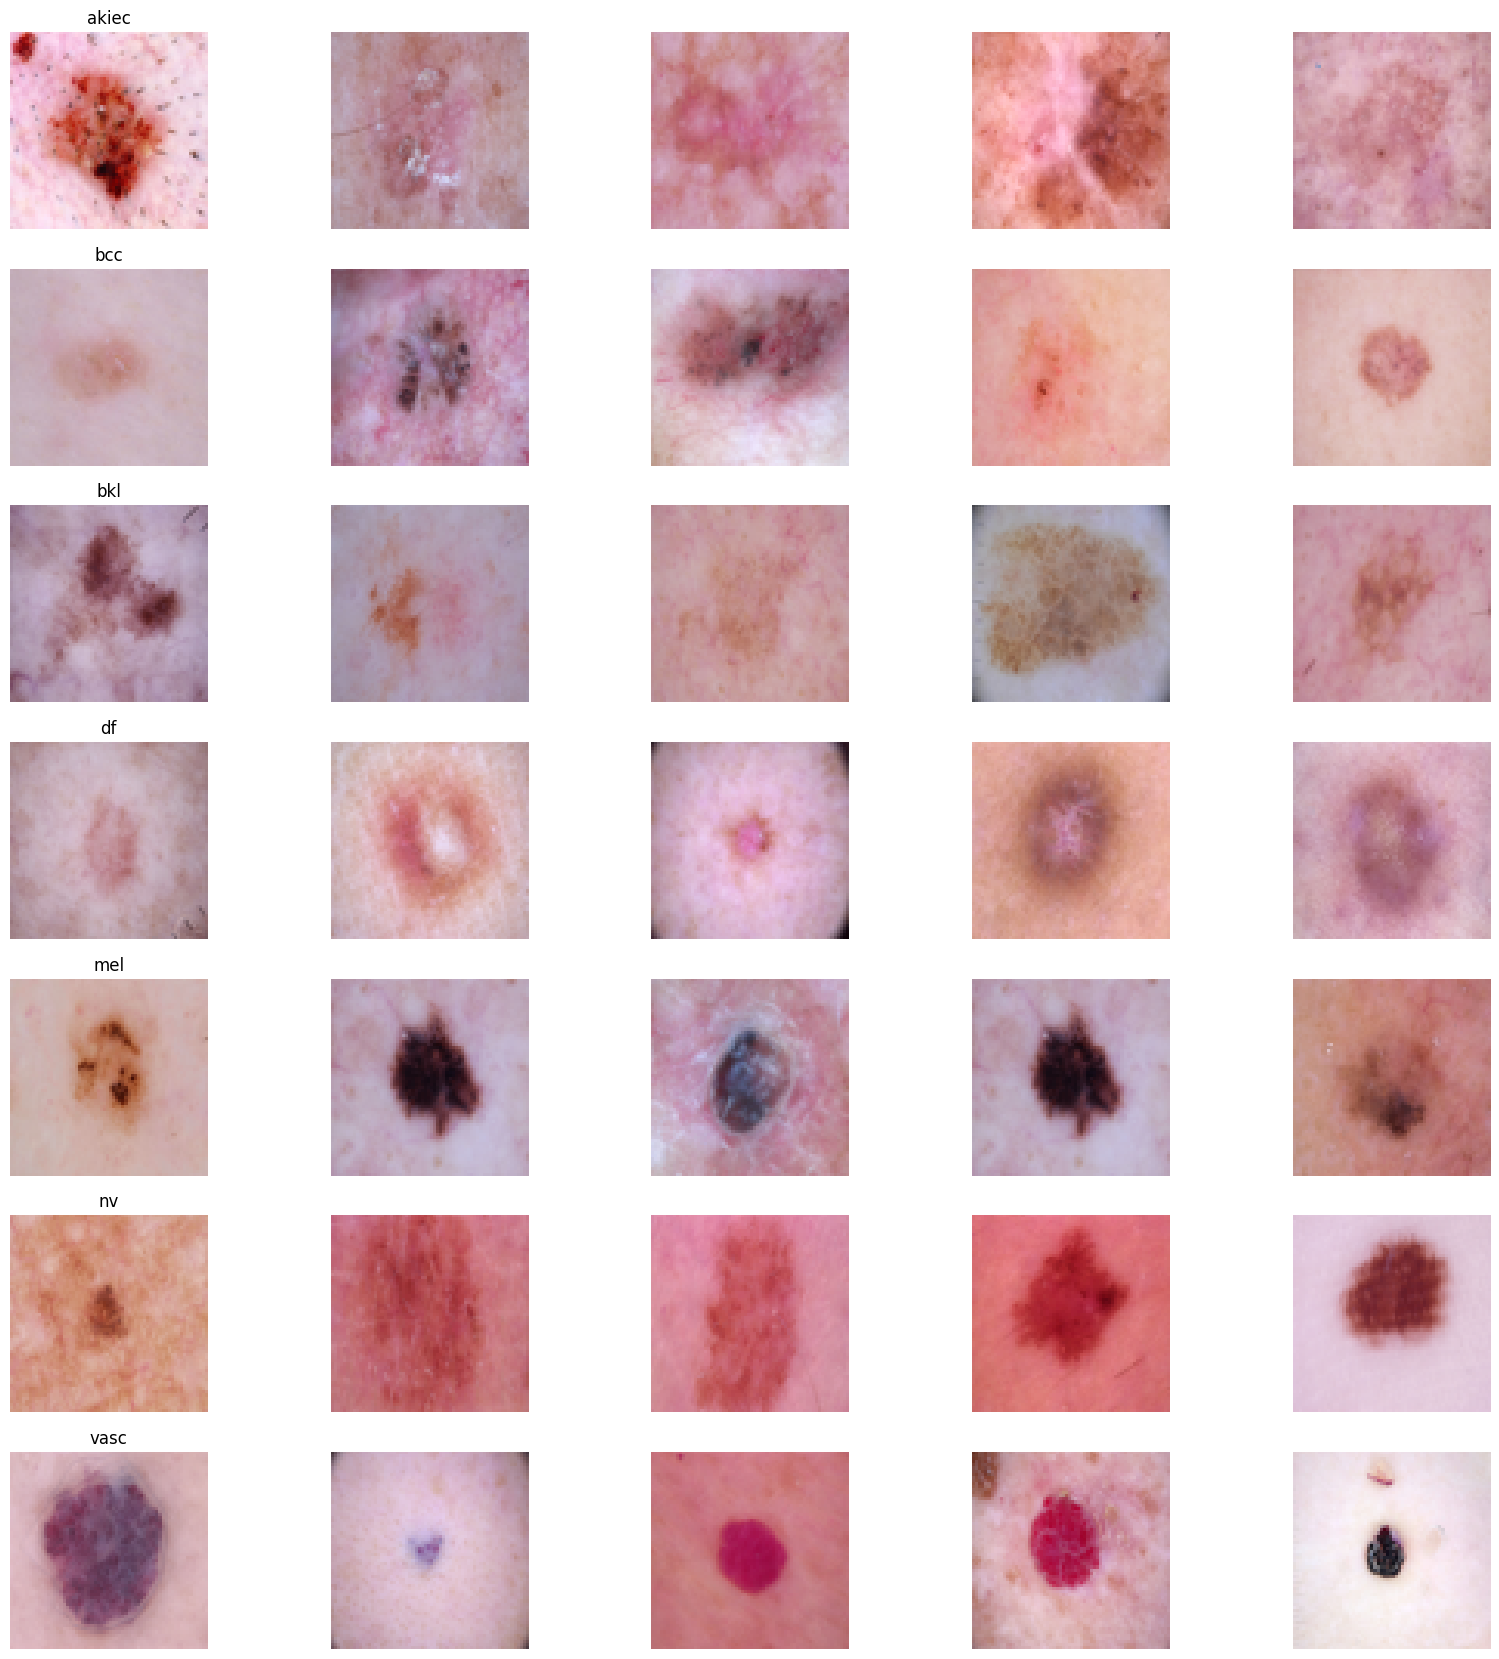

In [ ]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [ ]:
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255. # Scale values to 0-1. You can also used standardscaler or other scaling methods.
Y=skin_df_balanced['label'] #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem


In [ ]:
x_train_auto, x_test_auto, y_train_auto, y_test_auto = train_test_split(X, Y_cat, test_size=0.95, random_state=42)
x_unused, x_valid, y_unused, y_valid = train_test_split(x_test_auto, y_test_auto, test_size=0.05, random_state=42)
clf = ak.ImageClassifier(max_trials=25)
clf.fit(x_train_auto, y_train_auto, epochs=25)

Trial 25 Complete [00h 00m 08s]
val_loss: 1.9250848293304443

Best val_loss So Far: 1.1209958791732788
Total elapsed time: 01h 02m 24s
Epoch 1/25
6/6 [==============================] - 2s 78ms/step - loss: 2.4301 - accuracy: 0.1714
Epoch 2/25
6/6 [==============================] - 0s 21ms/step - loss: 1.7972 - accuracy: 0.2743
Epoch 3/25
6/6 [==============================] - 0s 20ms/step - loss: 1.6201 - accuracy: 0.3314
Epoch 4/25
6/6 [==============================] - 0s 20ms/step - loss: 1.3754 - accuracy: 0.4629
Epoch 5/25
6/6 [==============================] - 0s 23ms/step - loss: 1.1792 - accuracy: 0.5314
Epoch 6/25
6/6 [==============================] - 0s 20ms/step - loss: 0.9338 - accuracy: 0.6571
Epoch 7/25
6/6 [==============================] - 0s 22ms/step - loss: 0.7678 - accuracy: 0.7600
Epoch 8/25
6/6 [==============================] - 0s 24ms/step - loss: 0.6546 - accuracy: 0.7886
Epoch 9/25
6/6 [==============================] - 0s 22ms/step - loss: 0.4318 - accuracy:

In [ ]:
#Evaluate the classifier on test data
_, acc = clf.evaluate(x_valid, y_valid)
print("Accuracy = ", (acc * 100.0), "%")

6/6 [==============================] - 0s 45ms/step - loss: 6.7229 - accuracy: 0.3952
Accuracy =  39.52095806598663 %


In [ ]:
# get the final best performing model
model = clf.export_model()
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 64, 64, 3)         0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 64, 64, 3)         7         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 60, 60, 64)        0     

In [ ]:

score = model.evaluate(x_valid, y_valid)
print('Test accuracy:', score[1])

6/6 [==============================] - 0s 7ms/step - loss: 6.7229 - accuracy: 0.3952
Test accuracy: 0.39520958065986633
